## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\6.overlap.csv",header=None) 
df.head() 

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df[2].value_counts()  

0    50
1    50
Name: 2, dtype: int64

## checking outliers 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

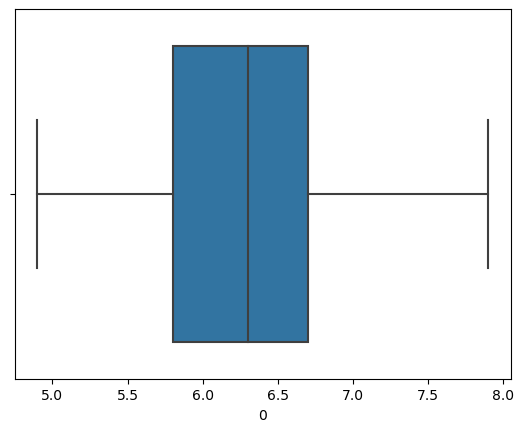

In [5]:
sns.boxplot(df[0])  

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

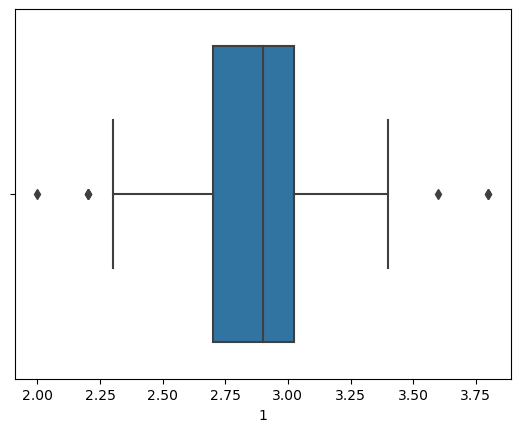

In [6]:
sns.boxplot(df[1]) 

In [7]:
## removing the outlier datapoints
df=df[(df[1]<3.50)&(df[1]>2.25)]  

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       93 non-null     float64
 1   1       93 non-null     float64
 2   2       93 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

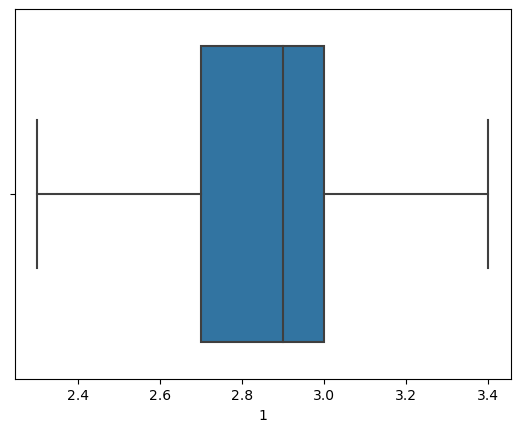

In [9]:
sns.boxplot(df[1])  

## Seperating the Input and Output Features

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]  

In [11]:
x.head()  

,0,1
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8


In [12]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: 2, dtype: int64

## Split the data into train and test

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [14]:
x_train.shape  

(83, 2)

In [15]:
x_test.shape  

(10, 2)

## Standardising input features 

In [16]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure 

In [17]:
model=Sequential()
model.add(Dense(12,activation="relu",kernel_regularizer=L1(0.1),input_dim=2))
model.add(Dense(8,activation="relu",kernel_regularizer=L1(0.1)))
model.add(Dense(1,activation="sigmoid"))  

In [18]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model

In [19]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1) 

Epoch 1/35
8/8 [==============================] - 1s 51ms/step - loss: 4.1866 - accuracy: 0.4865 - val_loss: 4.1378 - val_accuracy: 0.4444
Epoch 2/35
8/8 [==============================] - 0s 9ms/step - loss: 4.0838 - accuracy: 0.5541 - val_loss: 4.0363 - val_accuracy: 0.4444
Epoch 3/35
8/8 [==============================] - 0s 10ms/step - loss: 3.9838 - accuracy: 0.5541 - val_loss: 3.9343 - val_accuracy: 0.4444
Epoch 4/35
8/8 [==============================] - 0s 10ms/step - loss: 3.8851 - accuracy: 0.5946 - val_loss: 3.8369 - val_accuracy: 0.5556
Epoch 5/35
8/8 [==============================] - 0s 9ms/step - loss: 3.7903 - accuracy: 0.6216 - val_loss: 3.7424 - val_accuracy: 0.5556
Epoch 6/35
8/8 [==============================] - 0s 10ms/step - loss: 3.6973 - accuracy: 0.6351 - val_loss: 3.6494 - val_accuracy: 0.5556
Epoch 7/35
8/8 [==============================] - 0s 9ms/step - loss: 3.6054 - accuracy: 0.6486 - val_loss: 3.5567 - val_accuracy: 0.6667
Epoch 8/35
8/8 [==============

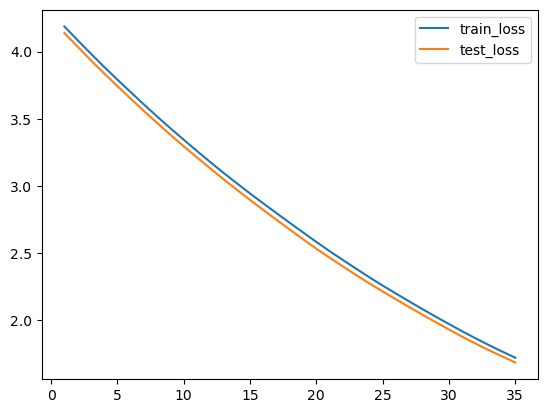

In [20]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model 

In [21]:
predicted=model.predict(x_test) 
predicted  

1/1 [==============================] - 0s 128ms/step


array([[0.4210738 ],
       [0.5052109 ],
       [0.59189254],
       [0.47280475],
       [0.4623128 ],
       [0.4649198 ],
       [0.40752414],
       [0.51910394],
       [0.40752414],
       [0.5329675 ]], dtype=float32)

In [22]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

## Evaluating the model

0.8


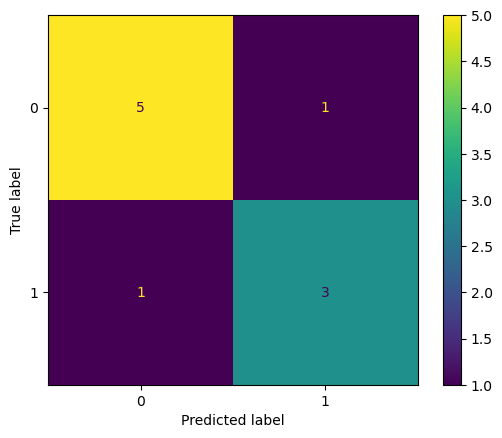

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

## PLOTING THE DECISION SURFACE

In [24]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

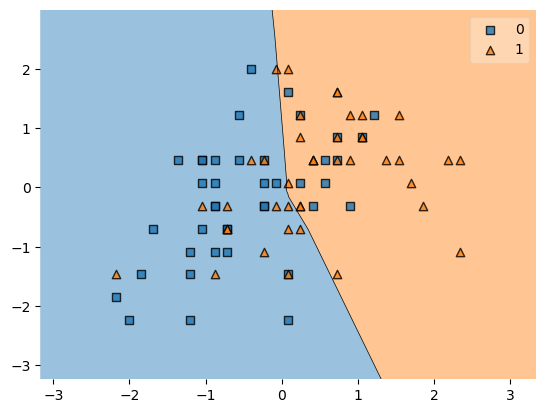

In [25]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

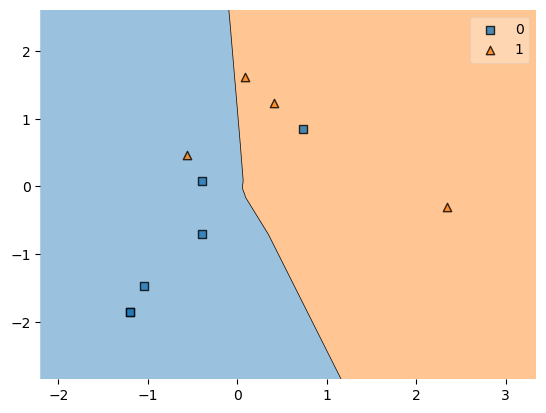

In [26]:
plot_decision_regions(x_test,y_test.values,clf=model)

## Conclusions:

###### This neural network model achieves an accuracy of 67%. The model architecture consists of 2 hidden layers with the following specifications:

- 1st HL:- 12 neurons, tanh as activation function 
- 2nd HL:- 8 neurons, tanh as activation function 

###### The output layer uses the sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 35 epochs.
 